In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap
from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#import shap
import plotly.express as px
import os
import scipy.stats as stats
import dataframe_image as dfi

C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\753473732.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\xavi_\OneDrive\Documentos\Tesis_docs\Tesis_Python\tesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [131]:
data1 = pd.read_csv("abundance_asv_dec_norm_7abril.csv", index_col=0)
data2 = pd.read_csv("tax_asv_dec_8feb.csv")
data3 = pd.read_csv("abundance_asv_dec_8feb.csv", index_col=0)

In [132]:
data1.shape
data2.shape

(513, 9)

In [133]:
data1.head(10)

,ASV1,ASV3,ASV4,ASV8,ASV13,ASV21,ASV23,ASV25,ASV27,ASV28,...,ASV12525,ASV12526,ASV12582,ASV12681,ASV12728,ASV12732,ASV12739,ASV12740,ASV12853,status
CAN-06,0.562103,0.394701,0.002550,0.002320,0.0,0.000000,0.002473,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1
CAN-07,0.000000,0.000000,0.128845,0.172630,0.0,0.000000,0.013340,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1
CAN-08,0.000000,0.000000,0.082487,0.030882,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1
CAN-10,0.000000,0.000000,0.013311,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1
CAN-11,0.119901,0.097597,0.042917,0.043816,0.0,0.000000,0.052630,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1
CAN-12,0.000000,0.000000,0.203727,0.100758,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1
CAN-13,0.000000,0.000000,0.303009,0.133451,0.0,0.000000,0.024071,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1
CAN-14,0.000000,0.000000,0.130137,0.075606,0.0,0.000000,0.027397,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000527,0,0.0,0.0,0.0,1
CAN-15,0.000000,0.000000,0.007150,0.003631,0.0,0.164972,0.000000,0.115232,0.0,0.010585,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1
CAN-18,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,1


In [134]:
data2

,Unnamed: 0,domain,phylum,class,order,family,genus,species,Species
0,ASV1,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
1,ASV3,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
2,ASV4,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,NaN,NaN
3,ASV8,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,NaN,NaN
4,ASV13,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
...,...,...,...,...,...,...,...,...,...
508,ASV12728,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Solobacterium,NaN,NaN
509,ASV12732,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
510,ASV12739,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,NaN,NaN,NaN,NaN
511,ASV12740,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,NaN,NaN


In [135]:
data2_sin_repetir = pd.read_csv("tax_asv_dec_8feb.csv", index_col=0)
data2_sin_repetir

,domain,phylum,class,order,family,genus,species,Species
ASV1,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
ASV3,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
ASV4,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,NaN,NaN
ASV8,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,NaN,NaN
ASV13,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
...,...,...,...,...,...,...,...,...
ASV12728,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Solobacterium,NaN,NaN
ASV12732,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
ASV12739,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,NaN,NaN,NaN,NaN
ASV12740,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,NaN,NaN


In [136]:

def eliminar_generos_repetidos_taxonomia(df):
  df_sin_repetir = df.drop_duplicates(subset='genus')
  #df_ordenado = df_sin_repetir.sort_values(by='genus')
  return df_sin_repetir

# Ejemplo de uso
tax_table_73 = eliminar_generos_repetidos_taxonomia(data2_sin_repetir.copy())

In [137]:
tax_table_73

,domain,phylum,class,order,family,genus,species,Species
ASV1,Bacteria,Campilobacterota,Campylobacteria,Campylobacterales,Helicobacteraceae,Helicobacter,NaN,NaN
ASV4,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,NaN,NaN
ASV21,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,NaN,NaN
ASV28,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NaN,NaN
ASV32,Bacteria,Firmicutes,Negativicutes,Veillonellales-Selenomonadales,Veillonellaceae,Veillonella,NaN,NaN
...,...,...,...,...,...,...,...,...
ASV6497,Bacteria,Firmicutes,Clostridia,Peptostreptococcales-Tissierellales,NaN,Peptoniphilus,NaN,NaN
ASV7234,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Sediminispirochaeta,NaN,NaN
ASV8151,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Weeksellaceae,Cloacibacterium,NaN,NaN
ASV12070,Bacteria,Proteobacteria,Gammaproteobacteria,Cardiobacteriales,Cardiobacteriaceae,Cardiobacterium,NaN,NaN


In [393]:
tax_table_73.to_csv(f"tax_table_73.csv")

In [41]:
#muestras_a_eliminar = ['CN-1', 'CN-2', 'CP-1', 'CP-2', 'Zymobiomics']
#data2 = data1[~data1['Unnamed: 0'].isin(muestras_a_eliminar)]
#data2

In [42]:
# Otra opción usando numpy (más eficiente)
#data2 = data2.iloc[:, :30]
#data2['Cancer_Status'] = np.where(data2['Unnamed: 0'].str.startswith('CAN-'), 1, 0)
#data2

In [138]:
#data1 = data1.drop(['Unnamed: 0'], axis=1)
data1['status'] = np.where(data1['status'] == 1, 'CAN', 'NOC')
data3['status'] = np.where(data3['status'] == 1, 'CAN', 'NOC')

data_etiquetas = data1['status']
data_can = data1[data1['status'] == 'CAN']
data_noc = data1[data1['status'] == 'NOC']

data_asv = data1.drop(['status'], axis=1)
data3 = data3.drop(['status'], axis=1)
data_can_sin_status = data_can.drop(['status'], axis=1)
data_noc_sin_status = data_noc.drop(['status'], axis=1)

In [139]:
data3

,ASV1,ASV3,ASV4,ASV8,ASV13,ASV21,ASV23,ASV25,ASV27,ASV28,...,ASV12524,ASV12525,ASV12526,ASV12582,ASV12681,ASV12728,ASV12732,ASV12739,ASV12740,ASV12853
CAN-06,22044,15479,100,91,0,0,97,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-07,0,0,821,1100,0,0,85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-08,0,0,406,152,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-10,0,0,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-11,3333,2713,1193,1218,0,0,1463,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-12,0,0,1290,638,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-13,0,0,856,377,0,0,68,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-14,0,0,494,287,0,0,104,0,0,0,...,0,0,0,0,0,2,0,0,0,0
CAN-15,0,0,256,130,0,5907,0,4126,0,379,...,0,0,0,0,0,0,0,0,0,0
CAN-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
data_asv.columns = data2['genus']
data3.columns = data2['genus']
data_can_sin_status.columns = data2['genus']
data_noc_sin_status.columns = data2['genus']

In [141]:
data3.head(6)

genus,Helicobacter,Helicobacter,Streptococcus,Streptococcus,Helicobacter,Prevotella,Prevotella,Prevotella,Helicobacter,Lactobacillus,...,Megasphaera,Treponema,NaN,Actinomyces,Fusobacterium,Solobacterium,Helicobacter,NaN,Pseudomonas,Fusobacterium
CAN-06,22044,15479,100,91,0,0,97,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-07,0,0,821,1100,0,0,85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-08,0,0,406,152,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-10,0,0,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-11,3333,2713,1193,1218,0,0,1463,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN-12,0,0,1290,638,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
data_asv = data_asv.groupby(data_asv.columns, axis=1).sum()
data3 = data3.groupby(data3.columns, axis=1).sum()
data_can_sin_status = data_can_sin_status.groupby(data_can_sin_status.columns, axis=1).sum()
data_noc_sin_status = data_noc_sin_status.groupby(data_noc_sin_status.columns, axis=1).sum()
#data_asv.head(5)

C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\2528471067.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_asv = data_asv.groupby(data_asv.columns, axis=1).sum()
C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\2528471067.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data3 = data3.groupby(data3.columns, axis=1).sum()
C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\2528471067.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_can_sin_status = data_can_sin_status.groupby(data_can_sin_status.columns, axis=1).sum()
C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\2528471067.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data_noc_sin_status = data_noc_sin_status.groupby(data_noc_sin_status.columns, axis=1).sum()

In [373]:
data3.to_csv(f"73_bacterias_abundancias.csv")

In [359]:
data_asv.to_csv(f"data_asv_73_bacterias.csv")

In [143]:
palette1 = {'CAN': 'gold', 'NOC': 'lightgreen'}

En el siguiente grafico, cuando defino mean_abundances, si quiero el grafico con las abundancias sin transformarlas poner "data3", pero si quiero las abundancias normalizadas poner "data_asv"

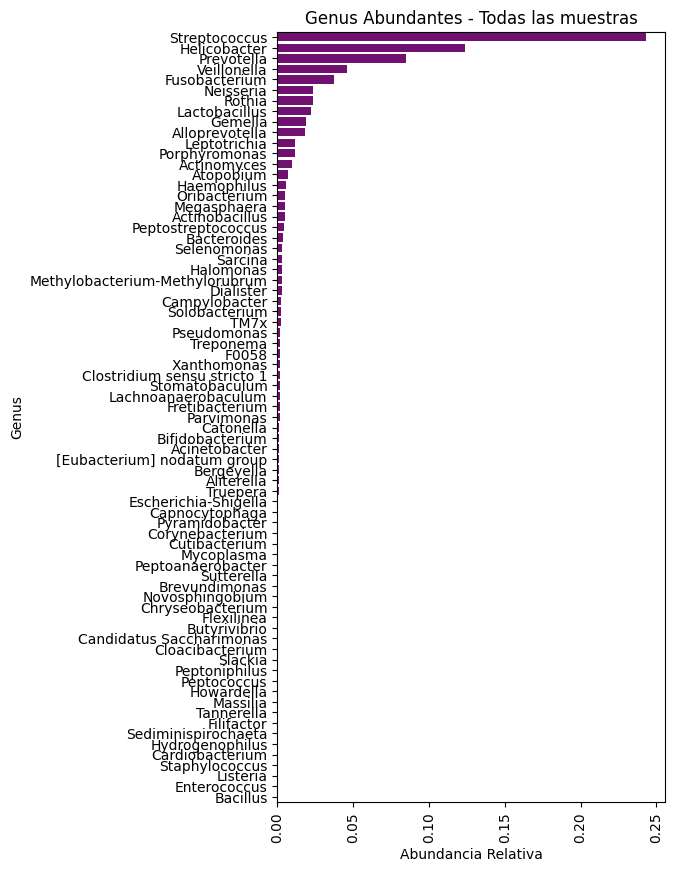

In [144]:
# Calcula las medias de abundancia para los ASV
mean_abundances = data_asv.mean()
# Ordena los ASV por abundancia
sorted_asv = mean_abundances.sort_values(ascending=False)
# Crea un gráfico de barras de las 100 especies más abundantes
plt.figure(figsize=(5, 10))
sns.barplot(y=sorted_asv.index, x=sorted_asv.values, color="purple")
plt.ylabel('Genus')
plt.xlabel('Abundancia Relativa')
plt.title('Genus Abundantes - Todas las muestras')
plt.xticks(rotation=90)
plt.show()

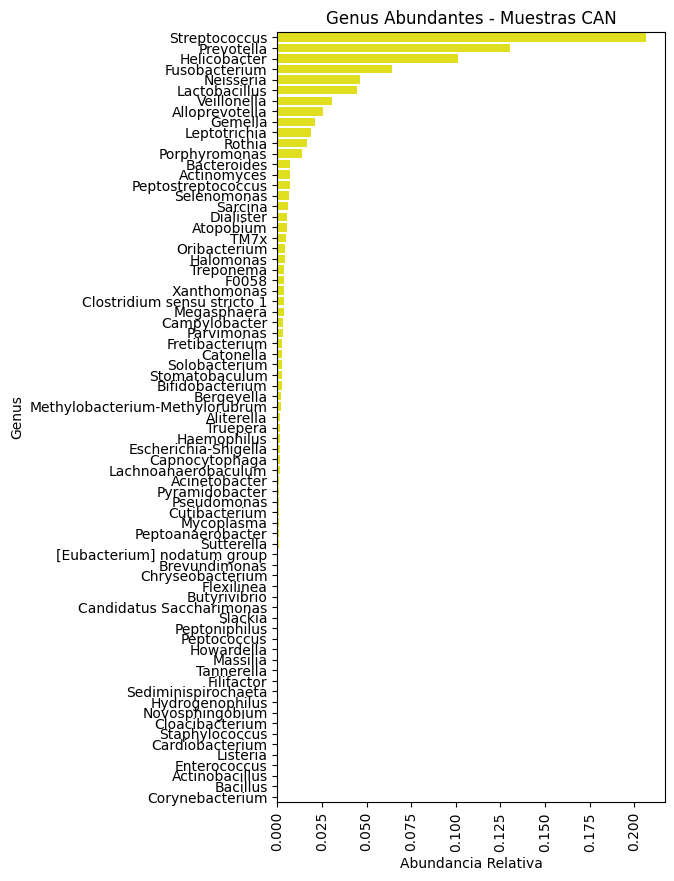

In [145]:
# Calcula las medias de abundancia para los ASV
mean_abundances = data_can_sin_status.mean()
# Ordena los ASV por abundancia
sorted_asv = mean_abundances.sort_values(ascending=False)
# Crea un gráfico de barras de las 100 especies más abundantes
plt.figure(figsize=(5, 10))
sns.barplot(y=sorted_asv.index, x=sorted_asv.values, color="yellow")
plt.ylabel('Genus')
plt.xlabel('Abundancia Relativa')
plt.title('Genus Abundantes - Muestras CAN')
plt.xticks(rotation=90)
plt.show()

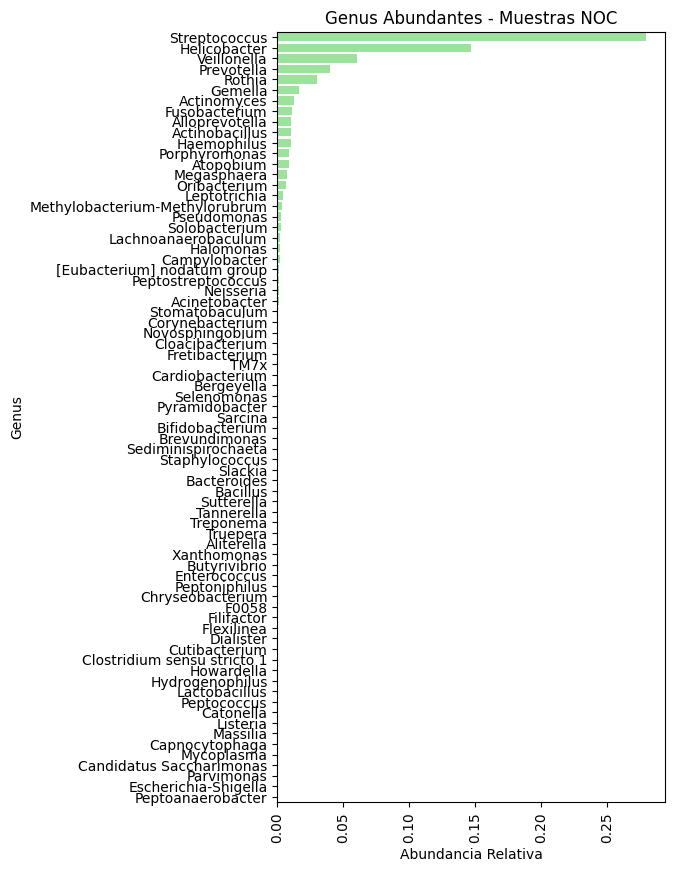

In [146]:
# Calcula las medias de abundancia para los ASV
mean_abundances = data_noc_sin_status.mean()
# Ordena los ASV por abundancia
sorted_asv = mean_abundances.sort_values(ascending=False)
# Crea un gráfico de barras de las 100 especies más abundantes
plt.figure(figsize=(5, 10))
sns.barplot(y=sorted_asv.index, x=sorted_asv.values, color="lightgreen")
plt.ylabel('Genus')
plt.xlabel('Abundancia Relativa')
plt.title('Genus Abundantes - Muestras NOC')
plt.xticks(rotation=90)
plt.show()

In [170]:
# Crear un directorio para guardar los gráficos
output_dir = 'C:/Users/xavi_/OneDrive/Documentos/Tesis_docs/Tesis_Python/abundancia_relativa_view'

In [ ]:
for asv_to_plot in data_asv.columns:
    if asv_to_plot!= 'status':
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=data_etiquetas, y=data_asv[asv_to_plot], palette=palette1)
        plt.xlabel('Cancer Status')
        plt.ylabel('Abundancia Relativa')
        plt.title(f'Abundancia Relativa - {asv_to_plot} ')

        # Perform Mann-Whitney U test
        #group1 = data_asv[data_etiquetas == 'cancer'][asv_to_plot]
        #group2 = data_asv[data_etiquetas == 'no cancer'][asv_to_plot]
        # u_stat, p_val = stats.mannwhitneyu(group1, group2)
        #d_stat, p_val = stats.ks_2samp(group1, group2)
        #chi2_stat, p_val, dof, expected = stats.chi2_contingency(group1,group2)
        #u_stat, p_val = stats.mannwhitneyu(group1, group2, use_continuity=True)

        # Print the p-value
        #print(f'P-value for {asv_to_plot}: {p_val:.4f}')

        plt.savefig(os.path.join(output_dir, f'{asv_to_plot}.png'))
        plt.close()

In [149]:
# Create a dictionary to store the p-values
p_values = {}

# Iterate over the bacterial columns
for col in data_asv.columns:
    if col != 'status':
        # Perform the Mann-Whitney U test
        u_stat, p_val_mw = stats.mannwhitneyu(data_asv[data_etiquetas == 'CAN'][col],
                                              data_asv[data_etiquetas == 'NOC'][col])
        # Perform the Kolmogorov-Smirnov test
        d_stat, p_val_ks = stats.ks_2samp(data_asv[data_etiquetas == 'CAN'][col],
                                          data_asv[data_etiquetas == 'NOC'][col])
        # Perform the Mann-Whitney U test with continuity correction
        u_stat_cc, p_val_mw_cc = stats.mannwhitneyu(data_asv[data_etiquetas == 'CAN'][col],
                                                    data_asv[data_etiquetas == 'NOC'][col],
                                                    use_continuity=True)
        # Perform the Kruskal-Wallis test
        #h_stat, p_val_kw = stats.kruskal(data_asv[data_etiquetas == 'cancer'][col],
        #                                 data_asv[data_etiquetas == 'no cancer'][col])
        # Perform the Wilcoxon rank-sum test
        #w_stat, p_val_w = stats.wilcoxon(data_asv[data_etiquetas == 'cancer'][col],
        #                                  data_asv[data_etiquetas == 'no cancer'][col])


        # Store the p-values in the dictionary
        p_values[col] = {'MWU p-value': p_val_mw,
                         'MWU stat': u_stat,
                         'KS p-value': p_val_ks,
                         'KS stat': d_stat,
                         #'KW p-value': p_val_kw,
                         #'KW stat': h_stat,
                         #'Wilcoxon p-value': p_val_w,
                         #'Wilcoxon stat': w_stat
        }

# Create a DataFrame from the dictionary
p_values_df = pd.DataFrame(p_values)

# Print the DataFrame
p_values_df = p_values_df.T

c:\Users\xavi_\OneDrive\Documentos\Tesis_docs\Tesis_Python\tesis\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


In [150]:
p_values_df.dtypes

MWU p-value    float64
MWU stat       float64
KS p-value     float64
KS stat        float64
dtype: object

In [151]:
p_values_df.head(30)

,MWU p-value,MWU stat,KS p-value,KS stat
Acinetobacter,0.632725,119.0,1.000000,0.066667
Actinobacillus,0.350648,105.0,1.000000,0.066667
Actinomyces,0.414725,95.5,0.678138,0.266667
Aliterella,0.350648,120.0,1.000000,0.066667
Alloprevotella,0.170172,145.0,0.678138,0.266667
Atopobium,0.701944,121.5,0.938331,0.200000
Bacillus,1.000000,112.5,1.000000,0.000000
Bacteroides,0.164394,127.5,0.999789,0.133333
Bergeyella,0.164394,127.5,0.999789,0.133333
Bifidobacterium,0.350648,120.0,1.000000,0.066667


In [152]:
p_values_sig = p_values_df[p_values_df['MWU p-value'] <0.2]
for col in p_values_sig.columns:
    p_values_sig[col] = p_values_sig[col].round(3)

p_values_sig['MWU stat'].round(0)
p_values_sig

C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\397533809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_values_sig[col] = p_values_sig[col].round(3)


,MWU p-value,MWU stat,KS p-value,KS stat
Alloprevotella,0.170,145.0,0.678,0.267
Bacteroides,0.164,127.5,1.000,0.133
Bergeyella,0.164,127.5,1.000,0.133
Candidatus Saccharimonas,0.164,127.5,1.000,0.133
Capnocytophaga,0.038,142.5,0.678,0.267
Catonella,0.018,150.0,0.386,0.333
Corynebacterium,0.164,97.5,1.000,0.133
Dialister,0.080,135.0,0.938,0.200
Fusobacterium,0.024,166.5,0.026,0.533
Gemella,0.156,145.0,0.386,0.333


In [153]:
p_values_sig['MWU p-value'] = p_values_sig['MWU p-value'].astype(str)
p_values_sig['KS p-value'] = p_values_sig['KS p-value'].astype(str)

C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\4282969489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_values_sig['MWU p-value'] = p_values_sig['MWU p-value'].astype(str)
C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\4282969489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_values_sig['KS p-value'] = p_values_sig['KS p-value'].astype(str)


In [154]:
p_values_sig.loc["Capnocytophaga", 'MWU p-value'] = "* 0.038"
p_values_sig.loc["Catonella", 'MWU p-value'] = "* 0.018"
p_values_sig.loc["Fusobacterium", 'MWU p-value'] = "* 0.024"
p_values_sig.loc["Lactobacillus", 'MWU p-value'] = "* 0.038"
p_values_sig.loc["Neisseria", 'MWU p-value'] = "** 0.005"
p_values_sig.loc["Prevotella", 'MWU p-value'] = "* 0.023"
p_values_sig.loc["Selenomonas", 'MWU p-value'] = "* 0.018"
p_values_sig.loc["Treponema", 'MWU p-value'] = "* 0.038"

p_values_sig.loc["Fusobacterium", 'KS p-value'] = "* 0.026"
p_values_sig.loc["Neisseria", 'KS p-value'] = "* 0.026"


In [155]:
p_values_sig

,MWU p-value,MWU stat,KS p-value,KS stat
Alloprevotella,0.17,145.0,0.678,0.267
Bacteroides,0.164,127.5,1.0,0.133
Bergeyella,0.164,127.5,1.0,0.133
Candidatus Saccharimonas,0.164,127.5,1.0,0.133
Capnocytophaga,* 0.038,142.5,0.678,0.267
Catonella,* 0.018,150.0,0.386,0.333
Corynebacterium,0.164,97.5,1.0,0.133
Dialister,0.08,135.0,0.938,0.200
Fusobacterium,* 0.024,166.5,* 0.026,0.533
Gemella,0.156,145.0,0.386,0.333


In [76]:
#def highlight_low_pvalue(value):
    #if value < 0.05:
        #return 'background-color: #ffeb3b'  # Color de fondo amarillo
    #else:
        #return ''

#p_values_sig = p_values_sig.style.applymap(highlight_low_pvalue, subset=['MWU p-value'])

C:\Users\xavi_\AppData\Local\Temp\ipykernel_7548\3472127094.py:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  p_values_sig = p_values_sig.style.applymap(highlight_low_pvalue, subset=['MWU p-value'])


In [78]:
#type(p_values_sig)
#styled_df = p_values_sig.format(precision=2)

In [79]:
#styled_df

,MWU p-value,MWU stat,KS p-value,KS stat
Alloprevotella,0.17,145.00,0.68,0.27
Bacteroides,0.16,127.50,1.00,0.13
Bergeyella,0.16,127.50,1.00,0.13
Candidatus Saccharimonas,0.16,127.50,1.00,0.13
Capnocytophaga,0.04,142.50,0.68,0.27
Catonella,0.02,150.00,0.39,0.33
Corynebacterium,0.16,97.50,1.00,0.13
Dialister,0.08,135.00,0.94,0.20
Fusobacterium,0.02,166.50,0.03,0.53
Gemella,0.16,145.00,0.39,0.33


In [124]:
dfi.export(p_values_sig, 'p_values_bacterias.png')

In [156]:
data_asv_pca = data_asv.copy()

In [157]:
data_asv_pca.head()

genus,Acinetobacter,Actinobacillus,Actinomyces,Aliterella,Alloprevotella,Atopobium,Bacillus,Bacteroides,Bergeyella,Bifidobacterium,...,Stomatobaculum,Streptococcus,Sutterella,TM7x,Tannerella,Treponema,Truepera,Veillonella,Xanthomonas,[Eubacterium] nodatum group
CAN-06,0.000000,0.0,0.000790,0.0,0.001887,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.004870,0.0,0.000408,0.00000,0.000000,0.000000,0.005712,0.000000,0.0
CAN-07,0.000000,0.0,0.000000,0.0,0.014438,0.000000,0.0,0.0,0.019617,0.0,...,0.000000,0.301475,0.0,0.000000,0.00000,0.002668,0.000000,0.026365,0.000000,0.0
CAN-08,0.009346,0.0,0.066233,0.0,0.028444,0.015238,0.0,0.0,0.000000,0.0,...,0.005689,0.281593,0.0,0.000000,0.00000,0.000000,0.005892,0.013409,0.054246,0.0
CAN-10,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.013311,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
CAN-11,0.000000,0.0,0.000000,0.0,0.053133,0.005468,0.0,0.0,0.011476,0.0,...,0.000000,0.119145,0.0,0.000000,0.00241,0.004892,0.000000,0.086445,0.000000,0.0


In [158]:
# Realiza un PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_asv_pca)

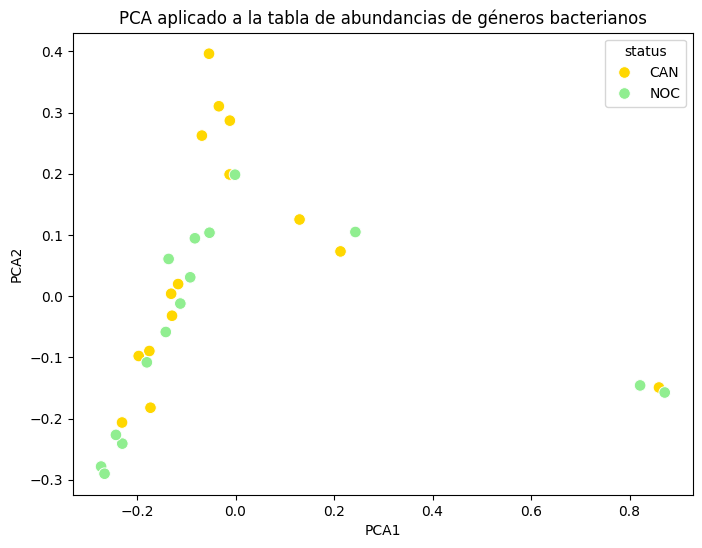

In [159]:
# Agrega los resultados al DataFrame
data_asv_pca['PCA1'] = pca_result[:, 0]
data_asv_pca['PCA2'] = pca_result[:, 1]
#data_asv_pca['PCA3'] = pca_result[:, 2]
#data_asv_pca['PCA4'] = pca_result[:, 3]
#data_asv_pca['PCA5'] = pca_result[:, 4]
data_asv_pca['status'] = data_etiquetas
# Crea un gráfico de dispersión PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='status', data=data_asv_pca, palette=palette1, s = 70)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA aplicado a la tabla de abundancias de géneros bacterianos')
plt.show()

In [160]:
data_asv_tsne_umap = data_asv_pca.drop(['status','PCA1','PCA2'], axis=1)
data_asv_tsne_umap.head()

genus,Acinetobacter,Actinobacillus,Actinomyces,Aliterella,Alloprevotella,Atopobium,Bacillus,Bacteroides,Bergeyella,Bifidobacterium,...,Stomatobaculum,Streptococcus,Sutterella,TM7x,Tannerella,Treponema,Truepera,Veillonella,Xanthomonas,[Eubacterium] nodatum group
CAN-06,0.000000,0.0,0.000790,0.0,0.001887,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.004870,0.0,0.000408,0.00000,0.000000,0.000000,0.005712,0.000000,0.0
CAN-07,0.000000,0.0,0.000000,0.0,0.014438,0.000000,0.0,0.0,0.019617,0.0,...,0.000000,0.301475,0.0,0.000000,0.00000,0.002668,0.000000,0.026365,0.000000,0.0
CAN-08,0.009346,0.0,0.066233,0.0,0.028444,0.015238,0.0,0.0,0.000000,0.0,...,0.005689,0.281593,0.0,0.000000,0.00000,0.000000,0.005892,0.013409,0.054246,0.0
CAN-10,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.013311,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
CAN-11,0.000000,0.0,0.000000,0.0,0.053133,0.005468,0.0,0.0,0.011476,0.0,...,0.000000,0.119145,0.0,0.000000,0.00241,0.004892,0.000000,0.086445,0.000000,0.0


In [161]:
#Entrenamos el TSNE
tsne_asv = TSNE(n_components=2, random_state=10, perplexity=2)
tsne_result = tsne_asv.fit_transform(data_asv_tsne_umap)

In [162]:
#Entrenamos UMAP
umap_model = umap.UMAP(n_neighbors=3, n_components=2, random_state=11)
umap_result = umap_model.fit_transform(data_asv_tsne_umap)

c:\Users\xavi_\OneDrive\Documentos\Tesis_docs\Tesis_Python\tesis\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [163]:
tsne_df = pd.DataFrame(data=tsne_result, columns=['Componente TSNE 1', 'Componente TSNE 2'])
umap_df = pd.DataFrame(data=umap_result, columns=['Componente UMAP 1', 'Componente UMAP 2'])

In [164]:
tsne_df['status'] = data_asv_tsne_umap.index
tsne_df['status'] = np.where(tsne_df['status'].str.startswith('CAN-'), 'CAN', 'NOC')
umap_df['status'] = data_asv_tsne_umap.index
umap_df['status'] = np.where(umap_df['status'].str.startswith('CAN-'), 'CAN', 'NOC')

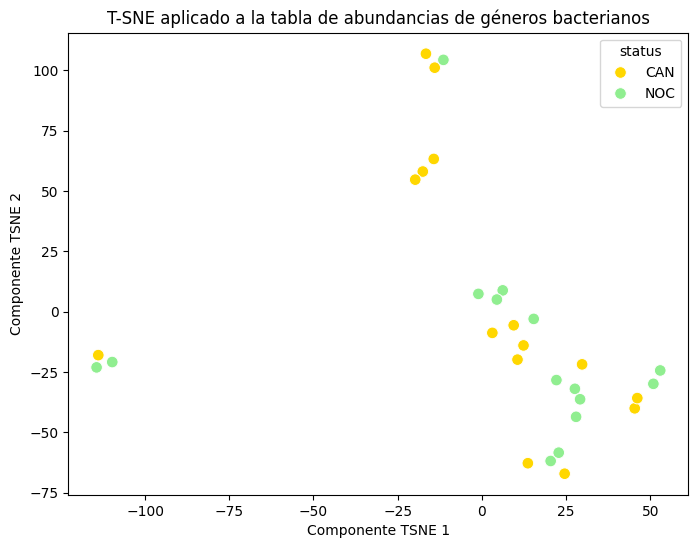

In [169]:
# Plotea los resultados de T-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Componente TSNE 1', y='Componente TSNE 2', hue='status', palette=palette1, s = 70)
plt.title('T-SNE aplicado a la tabla de abundancias de géneros bacterianos')
plt.show()

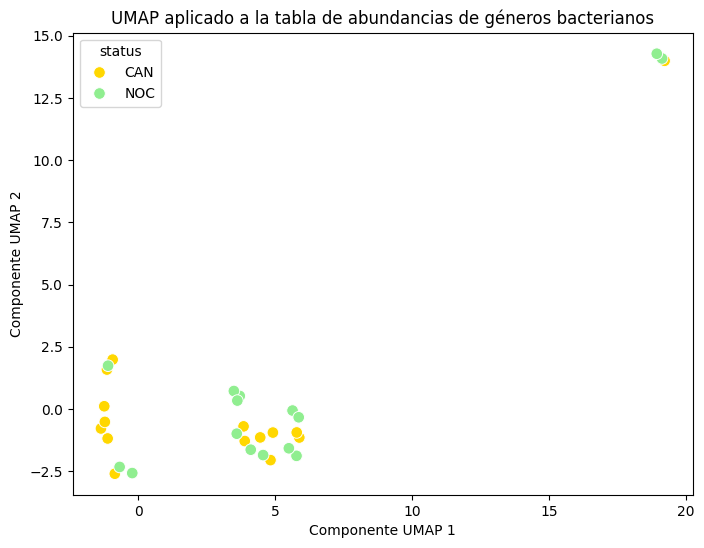

In [166]:
# Plotea los resultados de UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x='Componente UMAP 1', y='Componente UMAP 2', hue='status', palette=palette1, s = 70)
plt.title('UMAP aplicado a la tabla de abundancias de géneros bacterianos')
plt.show()

#### Random Forest

In [54]:
data_rf = data_asv_pca.drop(['PCA1','PCA2'], axis=1)

In [57]:
data_rf.head()

genus,Acinetobacter,Actinobacillus,Actinomyces,Aliterella,Alloprevotella,Atopobium,Bacillus,Bacteroides,Bergeyella,Bifidobacterium,...,Streptococcus,Sutterella,TM7x,Tannerella,Treponema,Truepera,Veillonella,Xanthomonas,[Eubacterium] nodatum group,status
CAN-06,0.000000,0.0,0.000790,0.0,0.001887,0.000000,0.0,0.0,0.000000,0.0,...,0.004870,0.0,0.000408,0.00000,0.000000,0.000000,0.005712,0.000000,0.0,cancer
CAN-07,0.000000,0.0,0.000000,0.0,0.014438,0.000000,0.0,0.0,0.019617,0.0,...,0.301475,0.0,0.000000,0.00000,0.002668,0.000000,0.026365,0.000000,0.0,cancer
CAN-08,0.009346,0.0,0.066233,0.0,0.028444,0.015238,0.0,0.0,0.000000,0.0,...,0.281593,0.0,0.000000,0.00000,0.000000,0.005892,0.013409,0.054246,0.0,cancer
CAN-10,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.013311,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,cancer
CAN-11,0.000000,0.0,0.000000,0.0,0.053133,0.005468,0.0,0.0,0.011476,0.0,...,0.119145,0.0,0.000000,0.00241,0.004892,0.000000,0.086445,0.000000,0.0,cancer


In [58]:
y_rf = data_rf['status']
X_rf = data_rf.drop(['status'], axis=1) 

In [59]:
print(y_rf.shape)
print(X_rf.shape)

(30,)
(30, 73)


In [288]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=35)


In [289]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)

In [290]:
rf_model.fit(X_rf_train, y_rf_train)

RandomForestClassifier(random_state=2)

In [291]:
y_rf_pred = rf_model.predict(X_rf_test)

In [292]:
accuracy = accuracy_score(y_rf_test, y_rf_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 1.00


In [293]:
print(classification_report(y_rf_test, y_rf_pred))

              precision    recall  f1-score   support

      cancer       1.00      1.00      1.00         3
   no cancer       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



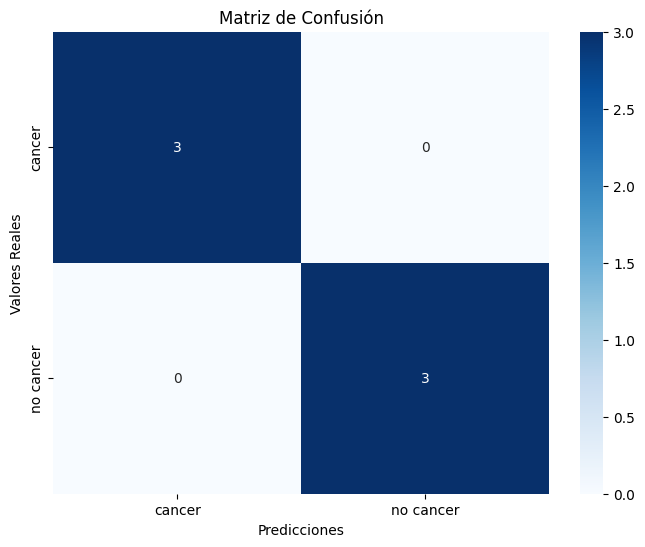

In [294]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_rf_test, y_rf_pred)

# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

In [295]:
feature_importance = rf_model.feature_importances_

In [296]:
# Crear un DataFrame para mostrar la importancia de las características junto con sus nombres
feature_importance_df = pd.DataFrame({'Feature': X_rf.columns, 'Importance': feature_importance})

# Ordenar las características por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print("Características más importantes:")
feature_importance_df.head(20)  # Muestra las 10 características más importantes

Características más importantes:


,Feature,Importance
44,Neisseria,0.089058
53,Prevotella,0.065571
14,Capnocytophaga,0.057612
64,Streptococcus,0.055407
59,Selenomonas,0.055358
37,Lactobacillus,0.053685
52,Porphyromonas,0.052521
4,Alloprevotella,0.046752
70,Veillonella,0.046574
29,Fusobacterium,0.042779


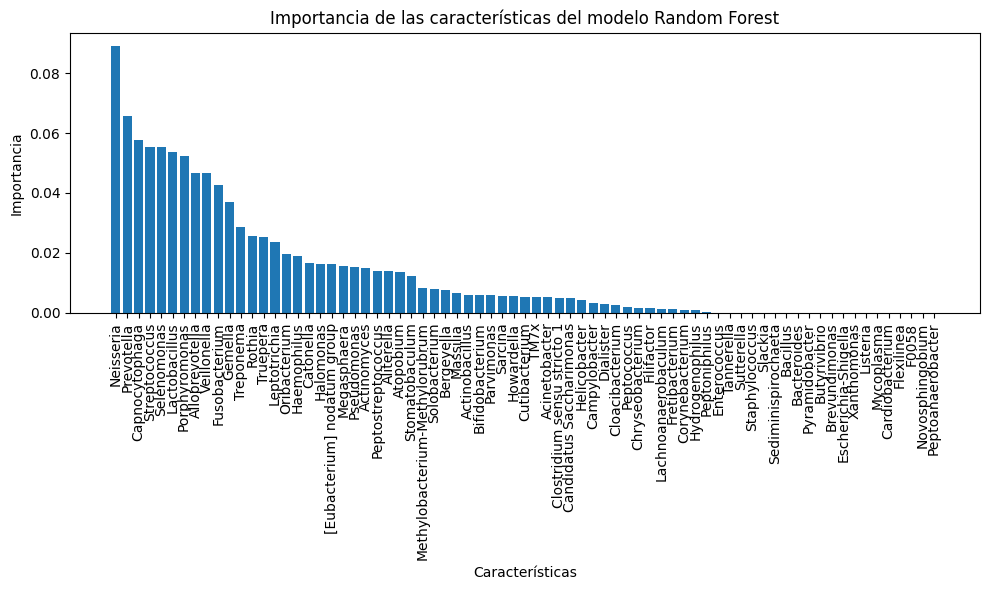

In [434]:
# Obtener los nombres de las características (ASV)
feature_names = X_rf.columns

# Ordenar las características por importancia
sorted_indices = feature_importance.argsort()[::-1]

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características del modelo Random Forest')
plt.tight_layout()
plt.show()

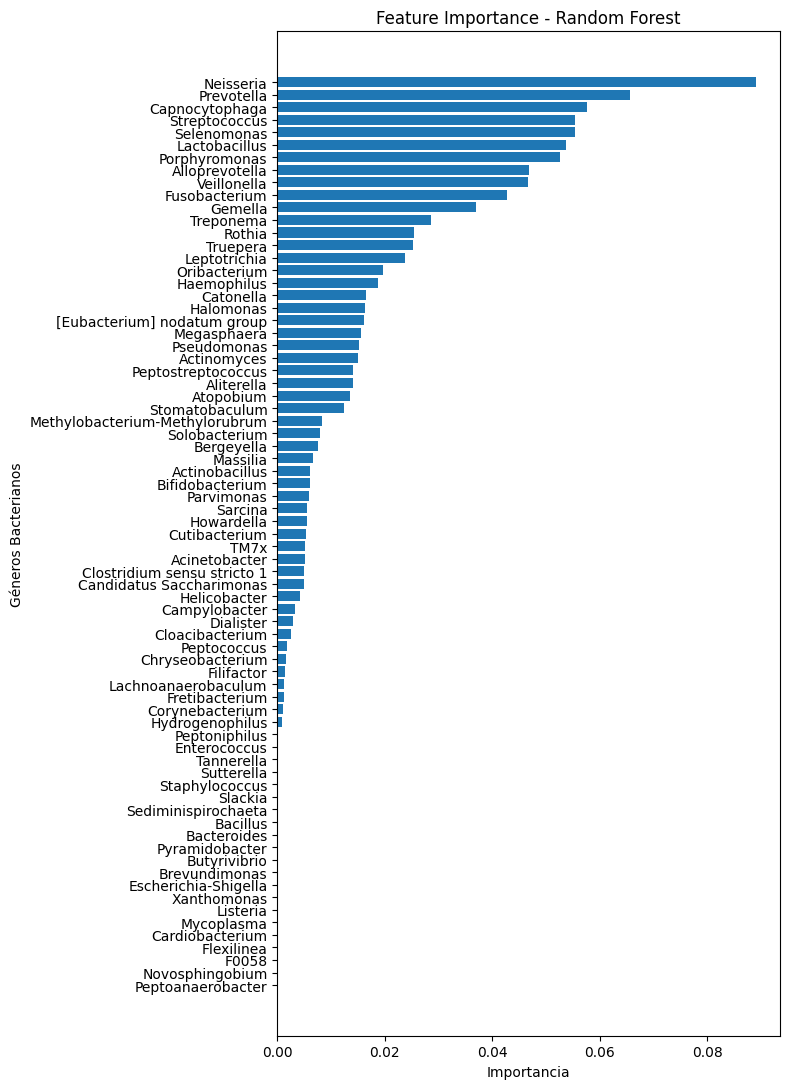

In [440]:
sorted_indices = np.argsort(feature_importance)[::1]
# Crear un gráfico de barras horizontal para visualizar la importancia de las características
plt.figure(figsize=(8, 11))
plt.barh(range(len(feature_names)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Importancia')
plt.ylabel('Géneros Bacterianos')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

### Lasso

In [310]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [465]:
lasso_model = Lasso(alpha=0.01, max_iter=1000)

In [466]:
X_lasso = X_rf
y_lasso, labels = pd.factorize(y_rf)
y_lasso


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [467]:
print(X_lasso.shape)  
print(y_lasso.shape)

(30, 73)
(30,)


In [468]:
lasso_model.fit(X_lasso, y_lasso)

Lasso(alpha=0.01)

In [469]:
coefs = lasso_model.coef_

In [470]:
lasso_model

Lasso(alpha=0.01)

In [471]:
print("Coeficientes Lasso:")
for i, coef in enumerate(coefs):
    print(f"{X_lasso.columns[i]}: {coef:.6f}")

Coeficientes Lasso:
Acinetobacter: -0.000000
Actinobacillus: 0.000000
Actinomyces: 0.000000
Aliterella: -0.000000
Alloprevotella: -0.000000
Atopobium: 0.000000
Bacillus: 0.000000
Bacteroides: -0.000000
Bergeyella: -0.000000
Bifidobacterium: -0.000000
Brevundimonas: -0.000000
Butyrivibrio: -0.000000
Campylobacter: -0.000000
Candidatus Saccharimonas: -0.000000
Capnocytophaga: -0.000000
Cardiobacterium: 0.000000
Catonella: -0.000000
Chryseobacterium: -0.000000
Cloacibacterium: 0.000000
Clostridium sensu stricto 1: -0.000000
Corynebacterium: 0.000000
Cutibacterium: -0.000000
Dialister: -0.000000
Enterococcus: 0.000000
Escherichia-Shigella: -0.000000
F0058: -0.000000
Filifactor: -0.000000
Flexilinea: -0.000000
Fretibacterium: -0.000000
Fusobacterium: -0.323302
Gemella: -0.000000
Haemophilus: 0.000000
Halomonas: -0.000000
Helicobacter: 0.000000
Howardella: -0.000000
Hydrogenophilus: -0.000000
Lachnoanaerobaculum: 0.000000
Lactobacillus: -0.406411
Leptotrichia: -0.000000
Listeria: 0.000000
Ma

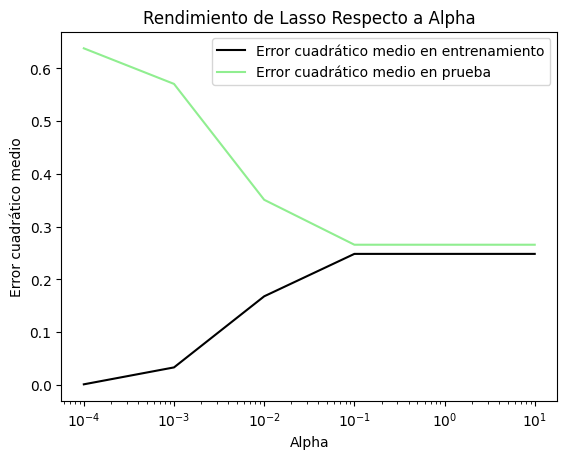

In [442]:
# Definir los valores de alpha
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=2)

# Crear una lista para almacenar los errores cuadrados medios
mse_train = []
mse_test = []

# Iterar sobre los valores de alpha
for alpha in alphas:
    # Crear un objeto Lasso con el valor de alpha actual
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # Entrenar el modelo con los datos de entrenamiento
    lasso.fit(X_train, y_train)
    
    # Predecir los valores de la variable respuesta para los datos de entrenamiento y prueba
    pred_train = lasso.predict(X_train)
    pred_test = lasso.predict(X_test)
    
    # Calcular los errores cuadrados medios para los datos de entrenamiento y prueba
    mse_train.append(mean_squared_error(y_train, pred_train))
    mse_test.append(mean_squared_error(y_test, pred_test))

# Plotear los resultados
plt.plot(alphas, mse_train, label='Error cuadrático medio en entrenamiento', color='black')
plt.plot(alphas, mse_test, label='Error cuadrático medio en prueba', color = 'lightgreen')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error cuadrático medio')
plt.title('Rendimiento de Lasso Respecto a Alpha')
plt.legend()
plt.show()

### Ridge

In [405]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [416]:
ridge_model = Ridge(alpha=0.1, max_iter=1000)

In [417]:
ridge_model.fit(X_lasso, y_lasso)

Ridge(alpha=0.1, max_iter=1000)

In [418]:
ridge_coefs = ridge_model.coef_

In [419]:
print("Coeficientes Lasso:")
for i, coef in enumerate(ridge_coefs):
    print(f"{X_lasso.columns[i]}: {coef:.6f}")

Coeficientes Lasso:
Acinetobacter: -0.035151
Actinobacillus: 0.442502
Actinomyces: -0.015781
Aliterella: -0.040436
Alloprevotella: -0.675046
Atopobium: 0.116749
Bacillus: 0.000000
Bacteroides: -0.182888
Bergeyella: -0.065259
Bifidobacterium: -0.005361
Brevundimonas: -0.021726
Butyrivibrio: -0.000975
Campylobacter: -0.123812
Candidatus Saccharimonas: -0.010299
Capnocytophaga: -0.061363
Cardiobacterium: 0.001345
Catonella: -0.092085
Chryseobacterium: -0.043325
Cloacibacterium: 0.009119
Clostridium sensu stricto 1: -0.132293
Corynebacterium: 0.028047
Cutibacterium: -0.027347
Dialister: -0.096753
Enterococcus: 0.000000
Escherichia-Shigella: -0.087566
F0058: -0.258940
Filifactor: -0.005617
Flexilinea: -0.028771
Fretibacterium: -0.007674
Fusobacterium: -1.440186
Gemella: -0.220741
Haemophilus: 0.352118
Halomonas: -0.246187
Helicobacter: 0.012203
Howardella: -0.000448
Hydrogenophilus: -0.003819
Lachnoanaerobaculum: 0.065263
Lactobacillus: -1.452094
Leptotrichia: -0.118423
Listeria: 0.000000
M

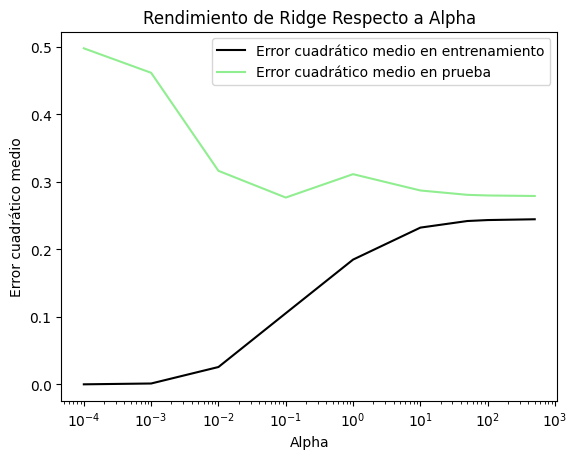

In [443]:
# Definir los valores de alpha
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10,50, 100, 500]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.3, random_state=17)

# Crear una lista para almacenar los errores cuadrados medios
mse_train = []
mse_test = []

# Iterar sobre los valores de alpha
for alpha in alphas:
    # Crear un objeto Ridge con el valor de alpha actual
    ridge = Ridge(alpha=alpha, max_iter=10000)
    
    # Entrenar el modelo con los datos de entrenamiento
    ridge.fit(X_train, y_train)
    
    # Predecir los valores de la variable respuesta para los datos de entrenamiento y prueba
    pred_train = ridge.predict(X_train)
    pred_test = ridge.predict(X_test)
    
    # Calcular los errores cuadrados medios para los datos de entrenamiento y prueba
    mse_train.append(mean_squared_error(y_train, pred_train))
    mse_test.append(mean_squared_error(y_test, pred_test))

# Plotear los resultados
plt.plot(alphas, mse_train, label='Error cuadrático medio en entrenamiento', color='black')
plt.plot(alphas, mse_test, label='Error cuadrático medio en prueba',color='lightgreen')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error cuadrático medio')
plt.title('Rendimiento de Ridge Respecto a Alpha')
plt.legend()
plt.show()